### Importing necessary Python libiraies 

In [2761]:
# import necessary libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import re
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")  # Ignore all warnings


In [2762]:
#loading dataset into python dataframe
df = pd.read_csv('raw_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Going through the dataset

In [2764]:
# going through the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


Order ID, Quantity Ordered, Price and Order date type have to be formatted.

### Cleaning dataset

In [2767]:
# checking duplicate
df.duplicated().value_counts()

False    185688
True       1162
Name: count, dtype: int64

In [2768]:
#remove duplicated values from dataset
df.drop_duplicates(inplace=True)

In [2769]:
# checking the total null values
df.isnull().sum()

Order ID            1
Product             1
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    1
dtype: int64

In [2770]:
# remove null values from dataset
df.dropna(inplace=True)

In [2771]:
# format data type 
df['Order Date'] = pd.to_datetime(df['Order Date'],errors='coerce')
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'],errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'],errors='coerce')
df['Order ID'] = pd.to_numeric(df['Order ID'],errors='coerce')


In [2772]:
df.isnull().sum()

Order ID            1
Product             0
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    0
dtype: int64

In [2773]:
# droping null values in both Quantity Ordered and Order ID
df.dropna(inplace=True)
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Order ID'] = df['Order ID'].astype(int)


### Data processing 

In [2775]:
# extracting date, hour, day, weekofyear, month, and year from Order_date
df['Hour'] = df['Order Date'].dt.hour # Hour of the day
df['Day'] = df['Order Date'].dt.day_name() # Day of the month
df['Month'] = df['Order Date'].dt.month_name() # name of the mohth in the year eg(january,febuary...)
df['mon'] = df['Order Date'].dt.month # month_position in the year eg(1,2...)
df['Year'] = df['Order Date'].dt.year # year
df['Week_of_Year'] = df['Order Date'].dt.isocalendar().week #week of the year


In [2776]:
#checking number of unique values in Product column
df['Product'].unique()


array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [2777]:
# Define category patterns

patterns = {
    'Phone': r'Phone|iPhone',
    'Accessories': r'Cable|Headphones|Batteries',
    'Monitors': r'Monitor',
    'Laptop':r'Laptop',
    'TV':r'TV|Flatscreen',
    'Appliances':r'Dryer|Washing Machine'
    }

# Function to categorize products based on patterns
def categorize_products(products):
    if pd.isnull(products):
        return 'Other'
    for category, pattern in patterns.items():
        if re.search(pattern, products, re.IGNORECASE):
            return category
    return 'Other'

# Apply categorization
df['categorize'] = df['Product'].apply(categorize_products)

In [2778]:
df['categorize'].unique()

array(['Accessories', 'Phone', 'Laptop', 'Monitors', 'TV', 'Appliances'],
      dtype=object)

In [2779]:
# create revenue column by multiplying Quantity_Ordered  by Price_Each column
df['Revenue'] = df['Quantity Ordered'] * df['Price Each']

In [2780]:
# extracting city from purchase address
df['city'] = df['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
print(df['city'].head())

0         Dallas
2         Boston
3    Los Angeles
4    Los Angeles
5    Los Angeles
Name: city, dtype: object


In [2781]:
# data type well formated, 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 186849
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int32         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int32         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Hour              185686 non-null  int32         
 7   Day               185686 non-null  object        
 8   Month             185686 non-null  object        
 9   mon               185686 non-null  int32         
 10  Year              185686 non-null  int32         
 11  Week_of_Year      185686 non-null  UInt32        
 12  categorize        185686 non-null  object        
 13  Revenue           185686 non-null  float64       
 14  city     

Now the dataset is well cleaned up properly and processed.

### Explotatrary Data Analysis (EDA)

#### Sales Analysis

##### Best Month for Sales

In [2786]:
# Best Month for Sales
month_sales = df['Month'].value_counts().sort_values(ascending=False).reset_index()
px.bar(month_sales,x='Month',y='count',title='Monthly sales')


 ##### What day of the week has the highest sales?

In [2788]:
# Convert Week_of_Year into Week_of_Month (forcing a max of 4 weeks)
df['Week_of_Month'] = df.groupby(['Year', 'mon'])['Week_of_Year'].rank(method='dense').astype(int)

# If a month has a 5th week, merge it into the 4th week
df.loc[df['Week_of_Month'] > 4, 'Week_of_Month'] = 4  

# Group by Month, Week of Month, and Day of Week to get total Revenue (everyday sales calculation)
weekly_sales = df.groupby(['mon', 'Week_of_Month', 'Day'], as_index=False)['Revenue'].sum()

# Find the Best Sales Day per Week (Day with highest revenue in each week)
best_sales_per_week = weekly_sales.loc[weekly_sales.groupby(['mon', 'Week_of_Month'])['Revenue'].idxmax()]
print(best_sales_per_week.head(10))

# Create a Bar Chart in Plotly
px.bar(best_sales_per_week, x="Week_of_Month", y="Revenue", color="Day", facet_col='mon', title="Best Sales Day in Each Week of Every Month",
      labels={"Week_of_Month": "Week", "Revenue": "Total Sales", "Day": "Best Sales Day"}, text="Day", height=600, width=1100 )

    mon  Week_of_Month        Day    Revenue
5     1              1  Wednesday   79333.49
6     1              2     Friday   78402.59
16    1              3     Sunday   68084.88
25    1              4    Tuesday  121073.13
28    2              1   Saturday   77893.74
30    2              2     Friday   94507.13
43    2              3  Wednesday   92554.31
50    2              4  Wednesday  165428.44
52    3              1   Saturday   92309.70
59    3              2    Tuesday  100209.44


##### Timeline of Day of the Week vs. Revenue

     mon  Week_of_Month  Hour   Revenue
11     1              1    11  27853.72
45     1              2    21  31669.61
60     1              3    12  35481.69
90     1              4    18  55255.48
111    2              1    15  17242.42
133    2              2    13  45912.13
162    2              3    18  46944.73
187    2              4    19  58688.21
210    3              1    18  21315.86
235    3              2    19  57189.92
253    3              3    13  50280.62
276    3              4    12  93738.75
307    4              1    19  58858.11
324    4              2    12  64865.42
354    4              3    18  58033.26


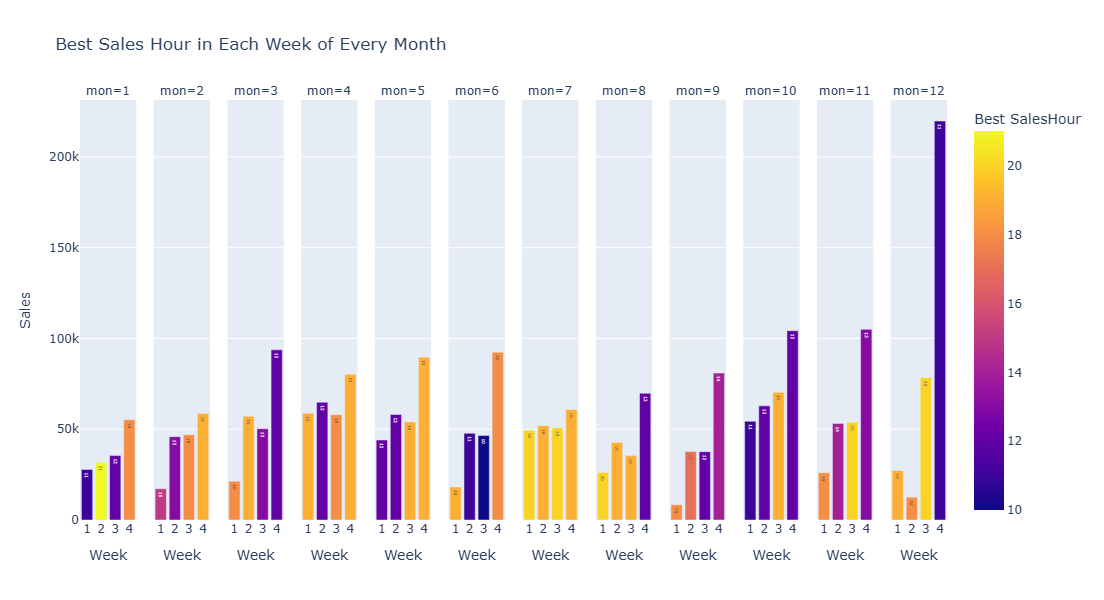

In [2790]:
# Convert Week_of_Year into Week_of_Month (forcing a max of 4 weeks)
df['Week_of_Month'] = df.groupby(['Year', 'mon'])['Week_of_Year'].rank(method='dense').astype(int)

# If a month has a 5th week, merge it into the 4th week
df.loc[df['Week_of_Month'] > 4, 'Week_of_Month'] = 4  

# Group by Month, Week of Month, and Day of Week to get total Revenue (everyday sales calculation)
weekly_sales = df.groupby(['mon', 'Week_of_Month', 'Hour'], as_index=False)['Revenue'].sum()

# Find the Best Sales Day per Week (Day with highest revenue in each week)
best_sales_per_week = weekly_sales.loc[weekly_sales.groupby(['mon', 'Week_of_Month'])['Revenue'].idxmax()]
print(best_sales_per_week.head(15))

# Create a Bar Chart in Plotly
fig = px.bar(best_sales_per_week,x="Week_of_Month",y="Revenue",color="Hour",facet_col='mon',title="Best Sales Hour in Each Week of Every Month",
    labels={"Week_of_Month": "Week ", "Revenue": "Sales", "Hour": "Best SalesHour"},text="Hour",height=600,width=1100)
fig.show()

##### Sales Per Hour

In [2792]:
Sales_per_hour = df.groupby('Hour')['Revenue'].sum().sort_values(ascending=False).reset_index()
print(Sales_per_hour.head())

px.bar(Sales_per_hour,x='Hour',y='Revenue')

   Hour     Revenue
0    19  2411971.14
1    12  2314359.85
2    11  2296619.84
3    20  2280784.36
4    18  2218374.01


#### Product Analysis

##### What Product Sold the Most?

In [2795]:
# what product sold the most
Product_sales = df['Product'].value_counts().sort_values(ascending=False).reset_index()
print(Product_sales.head())
px.bar(Product_sales,x='Product',y='count')

                    Product  count
0      USB-C Charging Cable  21859
1  Lightning Charging Cable  21610
2    AAA Batteries (4-pack)  20612
3     AA Batteries (4-pack)  20558
4          Wired Headphones  18849


##### Top Products for Each City

#####  Top 5 Product with highest revenue for each city

In [2798]:
# Group by city and product to get total quantity ordered and revenue
Cities_Product = df.groupby(['city', 'Product'], as_index=False).agg({'Quantity Ordered': 'sum','Revenue': 'sum'})

# Rename columns for clarity
Cities_Product.rename(columns={'Quantity Ordered': 'Orders Count'}, inplace=True)

# Function to get top 5 products for each city
def get_top_product(order):
    return order.nlargest(5, 'Orders Count')  # Sort by order count

# Apply function to find top 5 products per city
Cities_Product = Cities_Product.groupby(['city'], group_keys=False).apply(get_top_product)

# Create pivot tables for 'Revenue'
pivot_orders = Cities_Product.pivot_table(index='city', values='Orders Count', columns='Product', fill_value=0).reset_index()
print("Pivot Table: Orders Count")
pivot_orders


Pivot Table: Orders Count


Product,city,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
0,Atlanta,2193.0,2358.0,1874.0,1912.0,1576.0
1,Austin,1422.0,1668.0,1305.0,1249.0,1127.0
2,Boston,3011.0,3458.0,2482.0,2555.0,2222.0
3,Dallas,2260.0,2500.0,1862.0,1849.0,1664.0
4,Los Angeles,4434.0,4958.0,3765.0,3776.0,3266.0
5,New York City,3629.0,4119.0,3039.0,3263.0,2702.0
6,Portland,1939.0,2078.0,1528.0,1580.0,1360.0
7,San Francisco,6549.0,7404.0,5540.0,5883.0,4956.0
8,Seattle,2178.0,2443.0,1774.0,1864.0,1651.0


In [2799]:

# Convert pivot table to long format
pivot_orders_long = pivot_orders.reset_index().melt(id_vars='city', var_name='Product', value_name='Orders Count')
# Create bar chart
px.bar(pivot_orders_long,x="city",y="Orders Count",color="Product",barmode="group",
    title="Top 5 Products Ordered in Each City",
    labels={"city": "City", "Orders Count": "Total Orders"},width=1100,height=500)

#####  Top 5 highest Product in each city

In [2850]:
# Create pivot tables for 'Revenue'
pivot_orders = Cities_Product.pivot_table(index='city', values='Revenue', columns='Product', fill_value=0).reset_index()
# Display the pivot tables
print("Pivot Table: Revenue")
pivot_orders


Pivot Table: Revenue


Product,city,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
0,Atlanta,8421.12,7050.42,28016.30,22848.40,18896.24
1,Austin,5460.48,4987.32,19509.75,14925.55,13512.73
2,Boston,11562.24,10339.42,37105.90,30532.25,26641.78
3,Dallas,8678.40,7475.00,27836.90,22095.55,19951.36
4,Los Angeles,17026.56,14824.42,56286.75,45123.20,39159.34
5,New York City,13935.36,12315.81,45433.05,38992.85,32396.98
6,Portland,7445.76,6213.22,22843.60,18881.00,16306.40
7,San Francisco,25148.16,22137.96,82823.00,70301.85,59422.44
8,Seattle,8363.52,7304.57,26521.30,22274.80,19795.49


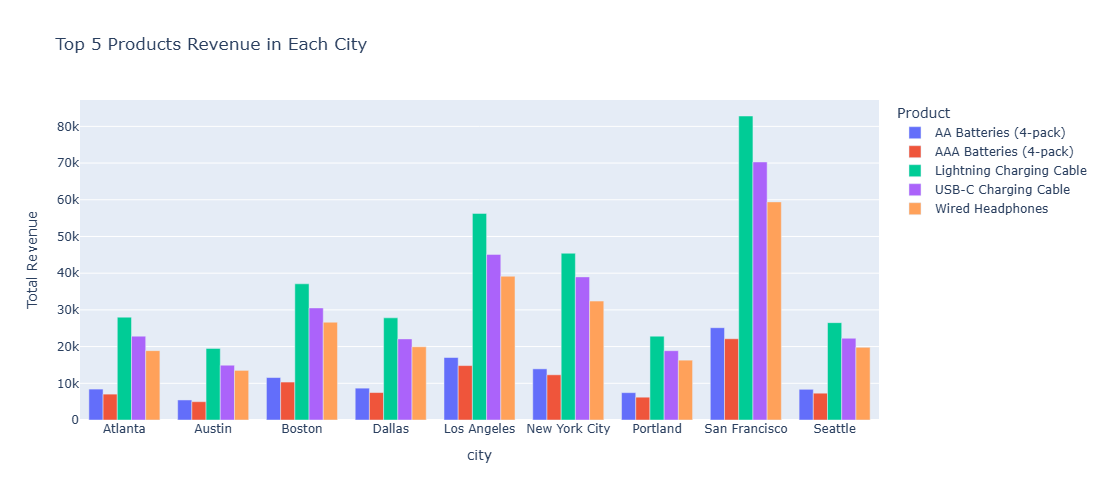

In [2852]:
# convert pivot table to long format
pivot_orders = pivot_orders.melt(id_vars='city',var_name='Product',value_name='Revenue')

px.bar(pivot_orders,x='city',y='Revenue',color='Product',barmode='group',title='Top 5 Products Revenue in Each City',
       labels={'city':'city','Revenue':'Total Revenue'},width=1100,height=500,)    

##### What Products Are Most Often Sold Together?


In [2804]:
from itertools import combinations
from collections import Counter

# Filter orders that contain multiple products
multi_product_orders = df[df['Order ID'].duplicated(keep=False)]
# Group products by 'Order ID'
group_orders = multi_product_orders.groupby('Order ID')['Product'].apply(list)

# Generate product pairs
product_pairs = []
for products in group_orders:
    product_pairs.extend(combinations(sorted(products),2)) # sort to avoid duplicate pair variations
#count most common product pairs
pair_counts = Counter(product_pairs)
#convert to DataFrame for easy analysis
most_common_pairs = pd.DataFrame(pair_counts.most_common(10), columns=["Product Pair", "Count"])

print(most_common_pairs)

                                   Product Pair  Count
0            (Lightning Charging Cable, iPhone)   1011
1          (Google Phone, USB-C Charging Cable)    997
2                    (Wired Headphones, iPhone)    462
3              (Google Phone, Wired Headphones)    422
4            (Apple Airpods Headphones, iPhone)    373
5       (USB-C Charging Cable, Vareebadd Phone)    368
6    (Bose SoundSport Headphones, Google Phone)    228
7      (USB-C Charging Cable, Wired Headphones)    203
8           (Vareebadd Phone, Wired Headphones)    149
9  (Lightning Charging Cable, Wired Headphones)    129


##### What Percentage of Orders Include Multiple Products?


In [2806]:
total_orders = df['Order ID'].nunique()  #count total order 
order_count = df['Order ID'].value_counts()      # Count the number of products per order

multiple_id = order_count[order_count>1].count()     #count multiple order
single_order = order_count[order_count == 1].count()    # Get Single Product Orders (where count is 1)

percentage_multiple_order = (multiple_id/total_orders)*100   #find the percentage of multiple orde
percentage_single = 100 -percentage_multiple_order       #percentage of single order

#displays the output 
print(f'''
    Total_orders = {total_orders}\n
    Multiple_order = {multiple_id}\n
    Single_order = {single_order}\n
    Multiple_order % = {percentage_multiple_order}\n
    Single_order % = {percentage_single}
''')



    Total_orders = 178437

    Multiple_order = 6879

    Single_order = 171558

    Multiple_order % = 3.8551421510112815

    Single_order % = 96.14485784898872



#### Order Value Analysis


##### What Was the Highest Single-Order Value?


In [2809]:
highest_single_values  = df[df['Revenue'] == max(df['Revenue'])]
highest_single_values

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Hour,Day,Month,mon,Year,Week_of_Year,categorize,Revenue,city,Week_of_Month
4717,181069,Macbook Pro Laptop,2,1700.0,2019-04-27 21:01:00,"668 Park St, San Francisco, CA 94016",21,Saturday,April,4,2019,17,Laptop,3400.0,San Francisco,4
5219,181544,Macbook Pro Laptop,2,1700.0,2019-04-22 12:48:00,"731 11th St, New York City, NY 10001",12,Monday,April,4,2019,17,Laptop,3400.0,New York City,4
92026,210292,Macbook Pro Laptop,2,1700.0,2019-06-08 09:00:00,"953 Ridge St, San Francisco, CA 94016",9,Saturday,June,6,2019,23,Laptop,3400.0,San Francisco,2
127265,200528,Macbook Pro Laptop,2,1700.0,2019-05-13 13:40:00,"643 4th St, Boston, MA 02215",13,Monday,May,5,2019,20,Laptop,3400.0,Boston,3


##### whict city has the higest Revenue


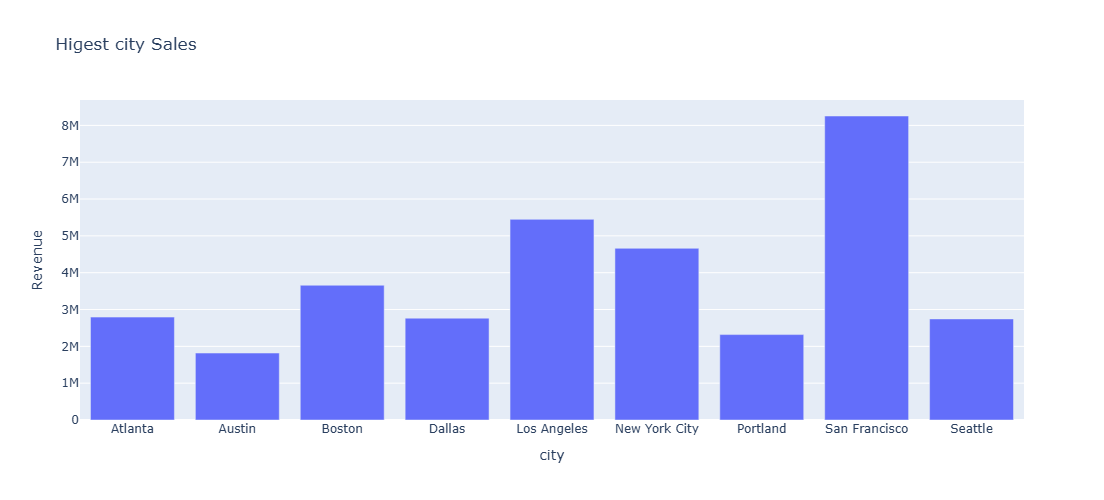

In [2864]:
city_higest_revenue = df.groupby('city',as_index=False).agg({'Order ID':'count','Revenue':'sum'})
city_higest_revenue.rename(columns={'Order ID':'Order Count'},inplace=True)

px.bar(city_higest_revenue,x='city',y='Revenue',title='Higest city Sales',width=1000,height=500)

In [2812]:
print(city_higest_revenue)
px.bar(city_higest_revenue,x='city',y='Order Count',title='Higest city Sales',width=1000,height=500)

            city  Order Count     Revenue
0        Atlanta        14863  2794199.07
1         Austin         9890  1818044.33
2         Boston        19901  3658627.65
3         Dallas        14797  2765373.96
4    Los Angeles        29564  5448304.28
5  New York City        24847  4661867.14
6       Portland        12449  2319331.94
7  San Francisco        44662  8254743.55
8        Seattle        14713  2745046.02


#### State Analysis


###### What Is the Distribution of States?


            city  count
0  San Francisco  44662
1    Los Angeles  29564
2  New York City  24847
3         Boston  19901
4        Atlanta  14863
5         Dallas  14797
6        Seattle  14713
7       Portland  12449
8         Austin   9890


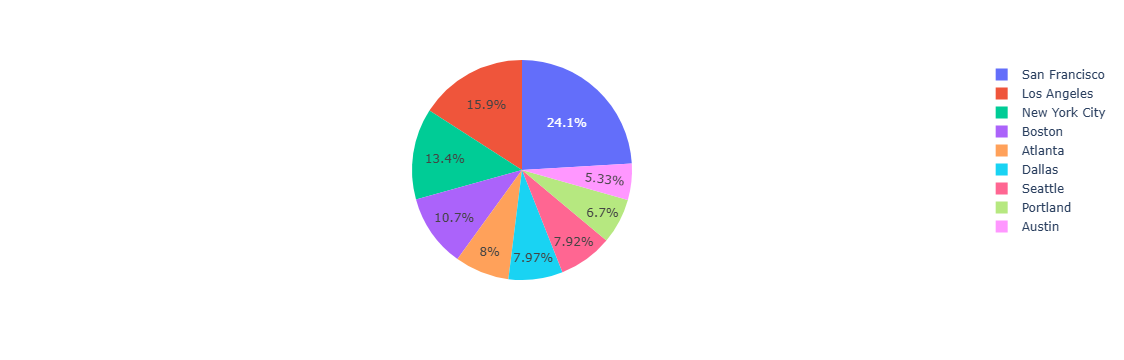

In [2815]:
city_distribution = df['city'].value_counts().reset_index()
print(city_distribution)
px.pie(city_distribution,values='count',names='city')